In [1]:
from utils import *
from tqdm import tqdm
from training import training
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

from models.encoder import Encoder
from models.Simclr import Simclr
from models.linear_classifier import LinearClassifier


In [2]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)
device = get_device()

 <function is_available at 0x0000029C0DDEAE50> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


In [3]:
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)

In [4]:
encoder = Encoder()
model = Simclr(encoder, head='mlp', feat_dim=128)

In [5]:
classifier = LinearClassifier()
#classifier = TwoLayersClassifier()
model.head = classifier

In [6]:
output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
epochs = 25
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)
train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = False, patience_LR = 2, patience_earlystop = 5)

  4%|▍         | 1/25 [00:11<04:25, 11.05s/it]

| Epoch: 1/25 | Train: Loss 2.2221 Accuracy : 0.2100 | Val: Loss 2.2483 Accuracy : 0.1637



  8%|▊         | 2/25 [00:15<02:47,  7.30s/it]

| Epoch: 2/25 | Train: Loss 2.0061 Accuracy : 0.4600 | Val: Loss 2.0742 Accuracy : 0.3851



 12%|█▏        | 3/25 [00:20<02:14,  6.12s/it]

| Epoch: 3/25 | Train: Loss 2.0296 Accuracy : 0.3600 | Val: Loss 2.0934 Accuracy : 0.3004



 16%|█▌        | 4/25 [00:24<01:53,  5.42s/it]

| Epoch: 4/25 | Train: Loss 2.0327 Accuracy : 0.2700 | Val: Loss 2.0995 Accuracy : 0.2323



 20%|██        | 5/25 [00:28<01:38,  4.93s/it]

| Epoch: 5/25 | Train: Loss 1.9996 Accuracy : 0.3300 | Val: Loss 2.0783 Accuracy : 0.2839



 24%|██▍       | 6/25 [00:33<01:30,  4.75s/it]

| Epoch: 6/25 | Train: Loss 1.9697 Accuracy : 0.3700 | Val: Loss 2.0556 Accuracy : 0.3056



 28%|██▊       | 7/25 [00:37<01:23,  4.63s/it]

| Epoch: 7/25 | Train: Loss 1.9397 Accuracy : 0.3800 | Val: Loss 2.0319 Accuracy : 0.3018



 32%|███▏      | 8/25 [00:42<01:18,  4.61s/it]

| Epoch: 8/25 | Train: Loss 1.9174 Accuracy : 0.4100 | Val: Loss 2.0156 Accuracy : 0.3341



 36%|███▌      | 9/25 [00:46<01:13,  4.59s/it]

| Epoch: 9/25 | Train: Loss 1.8797 Accuracy : 0.5400 | Val: Loss 1.9883 Accuracy : 0.4008



 40%|████      | 10/25 [00:51<01:08,  4.59s/it]

| Epoch: 10/25 | Train: Loss 1.8177 Accuracy : 0.6400 | Val: Loss 1.9431 Accuracy : 0.4867



 44%|████▍     | 11/25 [00:57<01:10,  5.01s/it]

| Epoch: 11/25 | Train: Loss 1.7609 Accuracy : 0.7200 | Val: Loss 1.8973 Accuracy : 0.5476



 48%|████▊     | 12/25 [01:02<01:06,  5.09s/it]

| Epoch: 12/25 | Train: Loss 1.7225 Accuracy : 0.8000 | Val: Loss 1.8653 Accuracy : 0.6043



 52%|█████▏    | 13/25 [01:07<00:59,  4.95s/it]

| Epoch: 13/25 | Train: Loss 1.6966 Accuracy : 0.8600 | Val: Loss 1.8462 Accuracy : 0.6448



 56%|█████▌    | 14/25 [01:11<00:53,  4.87s/it]

| Epoch: 14/25 | Train: Loss 1.6629 Accuracy : 0.8800 | Val: Loss 1.8183 Accuracy : 0.6840



 60%|██████    | 15/25 [01:16<00:48,  4.80s/it]

| Epoch: 15/25 | Train: Loss 1.6229 Accuracy : 0.9100 | Val: Loss 1.7802 Accuracy : 0.7373



 64%|██████▍   | 16/25 [01:21<00:42,  4.76s/it]

| Epoch: 16/25 | Train: Loss 1.6038 Accuracy : 0.9300 | Val: Loss 1.7616 Accuracy : 0.7584



 68%|██████▊   | 17/25 [01:26<00:38,  4.80s/it]

| Epoch: 17/25 | Train: Loss 1.5917 Accuracy : 0.9400 | Val: Loss 1.7504 Accuracy : 0.7737



 72%|███████▏  | 18/25 [01:30<00:33,  4.79s/it]

| Epoch: 18/25 | Train: Loss 1.5731 Accuracy : 0.9700 | Val: Loss 1.7320 Accuracy : 0.7958



 76%|███████▌  | 19/25 [01:35<00:28,  4.74s/it]

| Epoch: 19/25 | Train: Loss 1.5542 Accuracy : 0.9800 | Val: Loss 1.7127 Accuracy : 0.8101



 80%|████████  | 20/25 [01:40<00:23,  4.74s/it]

| Epoch: 20/25 | Train: Loss 1.5426 Accuracy : 0.9800 | Val: Loss 1.7007 Accuracy : 0.8199



 84%|████████▍ | 21/25 [01:44<00:18,  4.74s/it]

| Epoch: 21/25 | Train: Loss 1.5427 Accuracy : 0.9800 | Val: Loss 1.7025 Accuracy : 0.8193



 88%|████████▊ | 22/25 [01:49<00:14,  4.74s/it]

| Epoch: 22/25 | Train: Loss 1.5349 Accuracy : 0.9800 | Val: Loss 1.6957 Accuracy : 0.8211



 92%|█████████▏| 23/25 [01:54<00:09,  4.76s/it]

| Epoch: 23/25 | Train: Loss 1.5205 Accuracy : 0.9900 | Val: Loss 1.6806 Accuracy : 0.8306



 96%|█████████▌| 24/25 [01:59<00:04,  4.79s/it]

| Epoch: 24/25 | Train: Loss 1.5131 Accuracy : 0.9900 | Val: Loss 1.6736 Accuracy : 0.8356



100%|██████████| 25/25 [02:04<00:00,  4.97s/it]

| Epoch: 25/25 | Train: Loss 1.5099 Accuracy : 0.9800 | Val: Loss 1.6712 Accuracy : 0.8390



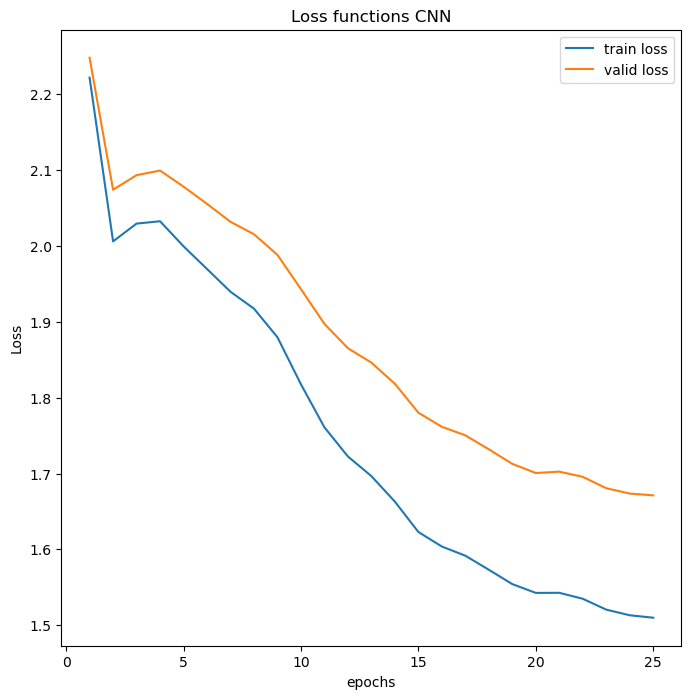

In [11]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions CNN")
plt.legend()
plt.savefig("Loss function CNN.jpeg")

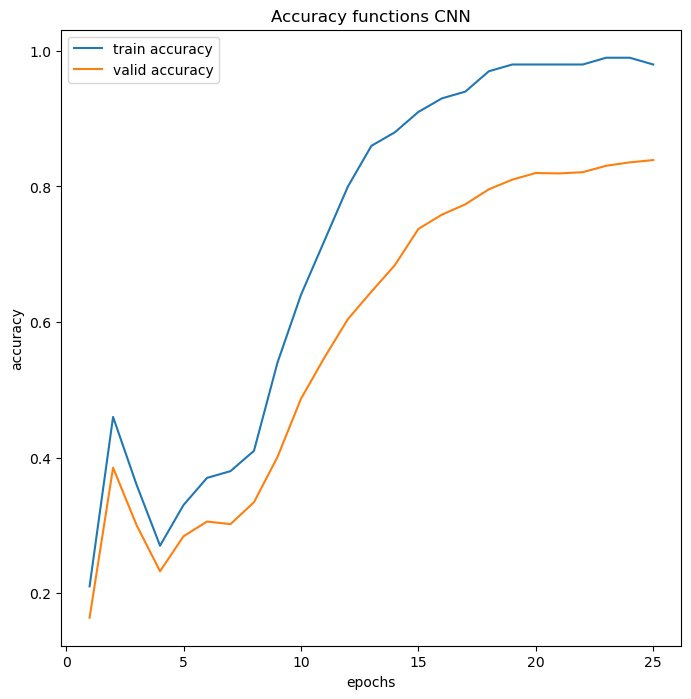

In [10]:
plt.figure(figsize=(8,8))


plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions CNN")
plt.legend()
plt.savefig("accuracy function CNN.jpeg")
